In [1]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To use statistical functions
import scipy.stats as stats

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

#importing itemgetter()
from operator import itemgetter

warnings.filterwarnings("ignore")

# This will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

<IPython.core.display.Javascript object>

Description
Background & Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

You need to identify the best possible model that will give the required performance

Objective

Explore and visualize the dataset.
Build a classification model to predict if the customer is going to churn or not
Optimize the model using appropriate techniques
Generate a set of insights and recommendations that will help the bank
Data Dictionary:

CLIENTNUM: Client number. Unique identifier for the customer holding the account
Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
Customer_Age: Age in Years
Gender: Gender of the account holder
Dependent_count: Number of dependents
Education_Level:  Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to a college student), Post-Graduate, Doctorate.
Marital_Status: Marital Status of the account holder
Income_Category: Annual Income Category of the account holder
Card_Category: Type of Card
Months_on_book: Period of relationship with the bank
Total_Relationship_Count: Total no. of products held by the customer
Months_Inactive_12_mon: No. of months inactive in the last 12 months
Contacts_Count_12_mon: No. of Contacts between the customer and bank in the last 12 months
Credit_Limit: Credit Limit on the Credit Card
Total_Revolving_Bal: The balance that carries over from one month to the next is the revolving balance
Avg_Open_To_Buy: Open to Buy refers to the amount left on the credit card to use (Average of last 12 months)
Total_Trans_Amt: Total Transaction Amount (Last 12 months)
Total_Trans_Ct: Total Transaction Count (Last 12 months)
Total_Ct_Chng_Q4_Q1: Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter
Total_Amt_Chng_Q4_Q1: Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter
Avg_Utilization_Ratio: Represents how much of the available credit the customer spent


## Business Insights

- Adaboost Tuned is returning perfect results on both train and test. 
- The Adaboost Tuned model will allow the bank to perfectly predict which customers will stop using the product vs not.
- As a newer bank, given the max age of a customer account, growth has stalled in the last year
- The bank only attempts customer contact 2-3 times a year, establishing a higher cadence with targeted messaging (using the adaboost algorithm) that is well designed and might be able to help with both customer retention and targeted growth. 
- All customers that had not been contacted in 6 months stopped using the product
- The largest segment of customers make under 40,000 a year.
- Customers tend to have a lower credit limit and lower transaction amount which does correlate
- Credit limit and Avg Open to buy are perfectly correlated and one can be dropped
- Customer Age correlates well with months on book.
- The bank should take a three fold approach  
    1) A large marketing campaign targeted at lower income individuals with 2-3 children.  
    2) A targeted marketing campaign utilizing the model to help drive customer retention.  
    3) Develop a strong customer reachout program  



In [2]:
df = pd.read_csv('BankChurners.csv')

<IPython.core.display.Javascript object>

In [3]:
df.shape

(10127, 21)

<IPython.core.display.Javascript object>

In [4]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


<IPython.core.display.Javascript object>

* Dependant Variable = Attrition_Flag
* It looks like the Income_Category attribute has some data 'abc' that does not fit will look at it furthere down
* Can drop clientnum as it wont be relevant to build this model but will be in use of the model later. 
* Generate One Hots
    - Attrition_Flag
    - Gender
    - Education_Level
    - Married_Status
    - Income_Category
    - Card_Category

In [5]:
df = df.drop(columns='CLIENTNUM')
one_hots = ['Attrition_Flag','Gender','Education_Level','Marital_Status','Income_Category', 'Card_Category']

<IPython.core.display.Javascript object>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           8608 non-null   object 
 5   Marital_Status            9378 non-null   object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

<IPython.core.display.Javascript object>

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Age,10127.000,46.326,8.017,26.000,41.000,46.000,52.000,73.000
Dependent_count,10127.000,2.346,1.299,0.000,1.000,2.000,3.000,5.000
Months_on_book,10127.000,35.928,7.986,13.000,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.000,3.813,1.554,1.000,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.000,2.341,1.011,0.000,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.000,2.455,1.106,0.000,2.000,2.000,3.000,6.000
Credit_Limit,10127.000,8631.954,9088.777,1438.300,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.000,1162.814,814.987,0.000,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.000,7469.140,9090.685,3.000,1324.500,3474.000,9859.000,34516.000
Total_Amt_Chng_Q4_Q1,10127.000,0.760,0.219,0.000,0.631,0.736,0.859,3.397


<IPython.core.display.Javascript object>

In [8]:
# Generating a data frame of missing values by count and %
missing = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
missing = pd.DataFrame(missing, columns=['%'])
missing['count'] = df.isnull().sum()

<IPython.core.display.Javascript object>

In [9]:
print('Missing Values in the data frame')
missing.head()

Missing Values in the data frame


,%,count
Education_Level,15.000,1519
Marital_Status,7.396,749
Attrition_Flag,0.000,0
Contacts_Count_12_mon,0.000,0
Total_Ct_Chng_Q4_Q1,0.000,0


<IPython.core.display.Javascript object>

There are a large number of missing values in:
     - Education_Level
     - Martial_Status

Will have to look into these attributues in addition to the Income_Category to see if we can impute the data or need to drop those rows

In [10]:
print('The count of unique values in the data frame')
df.nunique().sort_values(ascending=False)

The count of unique values in the data frame


Avg_Open_To_Buy             6813
Credit_Limit                6205
Total_Trans_Amt             5033
Total_Revolving_Bal         1974
Total_Amt_Chng_Q4_Q1        1158
Avg_Utilization_Ratio        964
Total_Ct_Chng_Q4_Q1          830
Total_Trans_Ct               126
Customer_Age                  45
Months_on_book                44
Contacts_Count_12_mon          7
Months_Inactive_12_mon         7
Total_Relationship_Count       6
Income_Category                6
Education_Level                6
Dependent_count                6
Card_Category                  4
Marital_Status                 3
Gender                         2
Attrition_Flag                 2
dtype: int64

<IPython.core.display.Javascript object>

In [11]:
# Printing a list of unique values, values shown in text file. Some categories have a large number of values so dropping those

vc = df.columns.drop(['Avg_Open_To_Buy','Credit_Limit','Total_Revolving_Bal','Total_Amt_Chng_Q4_Q1', 'Avg_Utilization_Ratio','Total_Ct_Chng_Q4_Q1','Total_Trans_Ct','Customer_Age','Months_on_book',])
for i in vc:
    print(i,'Has the following Unique Values')
    print(df[i].value_counts().sort_values(ascending=False))
    print('-'*50)

Attrition_Flag Has the following Unique Values
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
--------------------------------------------------
Gender Has the following Unique Values
F    5358
M    4769
Name: Gender, dtype: int64
--------------------------------------------------
Dependent_count Has the following Unique Values
3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: Dependent_count, dtype: int64
--------------------------------------------------
Education_Level Has the following Unique Values
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
--------------------------------------------------
Marital_Status Has the following Unique Values
Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64
--------------------------------------------------
Income_Category Has the followin

<IPython.core.display.Javascript object>

### Data Initial observations
* CLEINTNUM is not needed for this model we can use the index and drop this column
* Attrition_Flag is our dependant variable
<br/><br/>

* The following columns have missing values or other issues we will need to fix
   - Education_Level - has a number of missing values, will drop those as there is no hard data to fill in
   - Marital_Status - has a number of missing values, will drop those as there is no hard data to fill in
   - Income_Category - has a category 'abc', those rows might need to be dropped if no correlations can be found to impute the data. 
   <br/><br/>

* The following categorical columns can be dummies
   - Attrition_Flag
   - Gender
   - Education_Level
   - Married_Status
   - Income_Category
   - Card_Category
   <br/><br/>

* Customer Observation:
   -  Customers range in age from mid 20s to early 70s. The average customer age is mid 40s
   -  Customers have an average of 2.3 dependants
   -  On average customers have been with the bank for right at 3 years, with the longest being 56 months. This is a newer bank
   -  The min age for a customer is 13 months, this means the bank has not signed any new customers in over a year.
   - The typical customer has 3-4 products from the bank
   - Most inactive customers have been so for just over 2 months, it would appear inactive accounts are closed after 12 months
   - The bank attempts to contact a customer 2-3 times a year
   - The average credit limit 8600 with the max being 34,500
   - The typical customer carries over a roughly 1200 balance month to month  
   - Most customers use less than 25% of their available credit    
   <br/><br/>

* Attributes with Possible Outliers:
   - Credit_Limit - has a high end roughly 3 times that of the 75% quartile. While this is most likely an outlier I do not know it is bad for the model. Will dig more into this.
   - Avg_Utilization_Ratio - has a max almost double the 75%. That being said this might skew the model but is data that is important to identifying customer trends.
   - Customer_Age - Has outliers but considering the nature of the attribute will not treat
   - Months_on_Book - Has outliers but considering the nature of the attribute will not treat
   - Credit_Limit - Has outliers but considering the nature of the attribute will not treat
   - Total_Trans_Amt - Has outliers but considering the nature of the attribute will not treat
   <br/><br/>

* General Observations:
   - The income category has a value of ‘abc’ that will need treatment
   <br/><br/>


### Fixing Education_Level, Marital_Status & Income_Categories  

- Dropping missing values  
- Evaluating if there is a way to impute Income_Categories from the data available

In [12]:
# Dropping rows with missing values
df.dropna(inplace=True)

# Confirming all missing values have been treated
df.isnull().sum().sort_index(ascending=True)

Attrition_Flag              0
Avg_Open_To_Buy             0
Avg_Utilization_Ratio       0
Card_Category               0
Contacts_Count_12_mon       0
Credit_Limit                0
Customer_Age                0
Dependent_count             0
Education_Level             0
Gender                      0
Income_Category             0
Marital_Status              0
Months_Inactive_12_mon      0
Months_on_book              0
Total_Amt_Chng_Q4_Q1        0
Total_Ct_Chng_Q4_Q1         0
Total_Relationship_Count    0
Total_Revolving_Bal         0
Total_Trans_Amt             0
Total_Trans_Ct              0
dtype: int64

<IPython.core.display.Javascript object>

In [13]:
# Lets look at Income Category
df['Income_Category'].value_counts().sort_values(ascending=True)

$120K +            572
abc                892
$60K - $80K       1103
$80K - $120K      1202
$40K - $60K       1412
Less than $40K    2792
Name: Income_Category, dtype: int64

<IPython.core.display.Javascript object>

In [14]:
# Creating a dataframe for rows with 'abc' for Income_Category to look at the data
abc = df.loc[df['Income_Category'] == 'abc']
abc.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
19,Existing Customer,45,F,2,Graduate,Married,abc,Blue,37,6,1,2,14470.000,1157,13313.000,0.966,1207,21,0.909,0.080
28,Existing Customer,44,F,3,Uneducated,Single,abc,Blue,34,5,2,2,10100.000,0,10100.000,0.525,1052,18,1.571,0.000
39,Attrited Customer,66,F,0,Doctorate,Married,abc,Blue,56,5,4,3,7882.000,605,7277.000,1.052,704,16,0.143,0.077
44,Existing Customer,38,F,4,Graduate,Single,abc,Blue,28,2,3,3,9830.000,2055,7775.000,0.977,1042,23,0.917,0.209
58,Existing Customer,44,F,5,Graduate,Married,abc,Blue,35,4,1,2,6273.000,978,5295.000,2.275,1359,25,1.083,0.156


<IPython.core.display.Javascript object>

There is not a good correlation to impute a usable value instead of 'abc' will drop all rows with that value.

In [15]:
df = df[df['Income_Category'] != 'abc']
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000
5,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010.000,1247,2763.000,1.376,1088,24,0.846,0.311


<IPython.core.display.Javascript object>

In [16]:
df.shape

(7081, 20)

<IPython.core.display.Javascript object>

Between missing value treatments and the bad data for income we have cut out about 30% of our data set. 

## EDA  
-------------------------------
#### Reusable Functions
- Reusing functions provided in the class  
- Functions for both Univariate and Bivariate Analysis

In [17]:
# reusing provided function for generating graphs

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [18]:
# reusing provided function for generating graphs
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

In [19]:
# reusing provided function for generating graphs

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart
    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

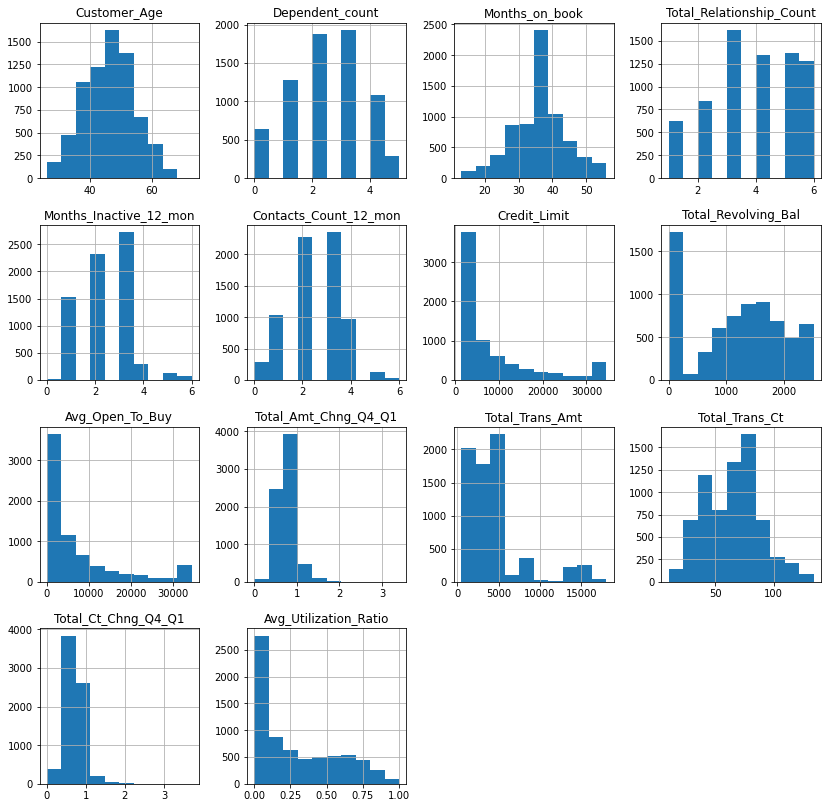

<IPython.core.display.Javascript object>

In [20]:
# creating histograms
df.hist(figsize=(14, 14))
plt.show()

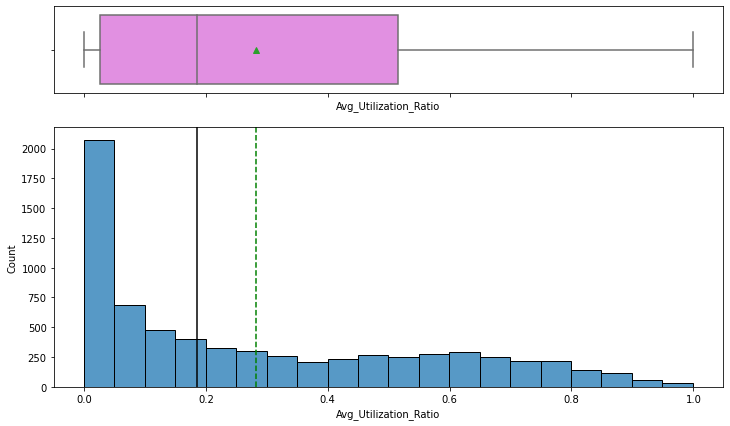

<IPython.core.display.Javascript object>

In [21]:
histogram_boxplot(df, 'Avg_Utilization_Ratio')

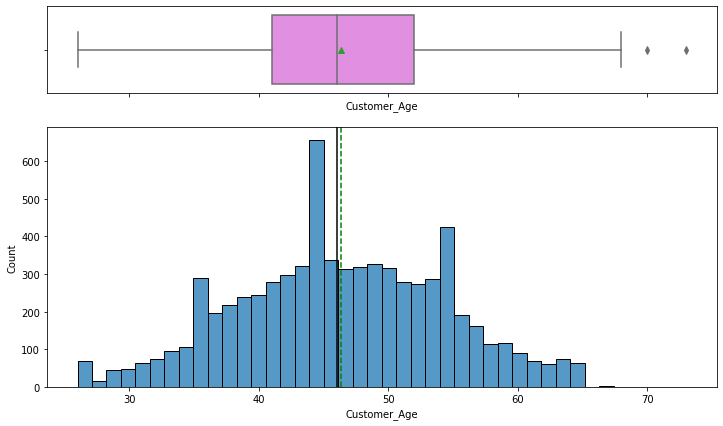

<IPython.core.display.Javascript object>

In [22]:
histogram_boxplot(df, 'Customer_Age')

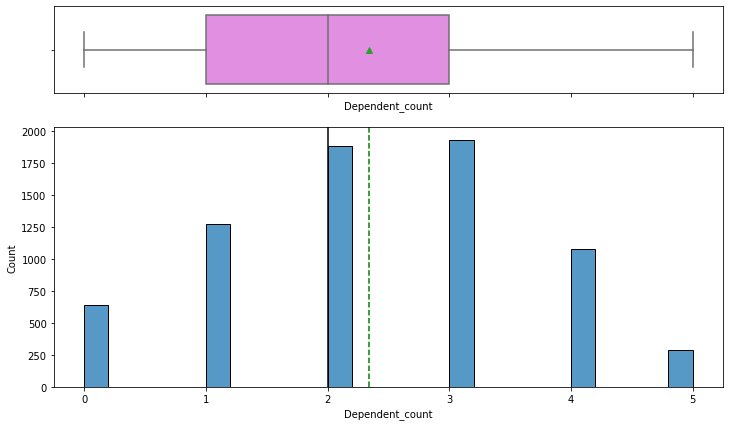

<IPython.core.display.Javascript object>

In [23]:
histogram_boxplot(df, 'Dependent_count')

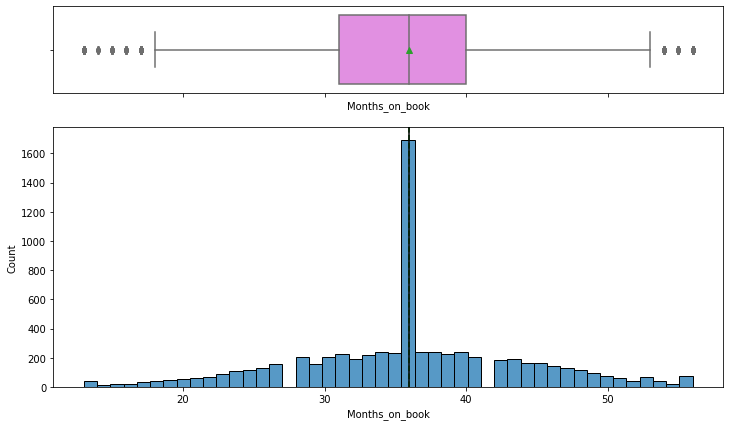

<IPython.core.display.Javascript object>

In [24]:
histogram_boxplot(df, 'Months_on_book')

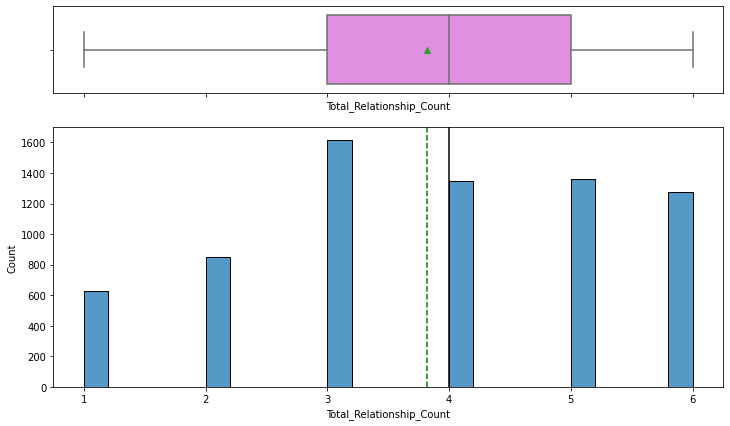

<IPython.core.display.Javascript object>

In [25]:
histogram_boxplot(df, 'Total_Relationship_Count')

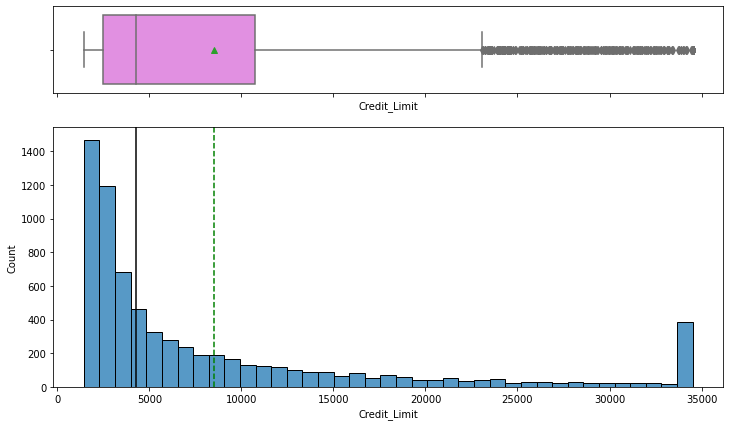

<IPython.core.display.Javascript object>

In [26]:
histogram_boxplot(df, 'Credit_Limit')

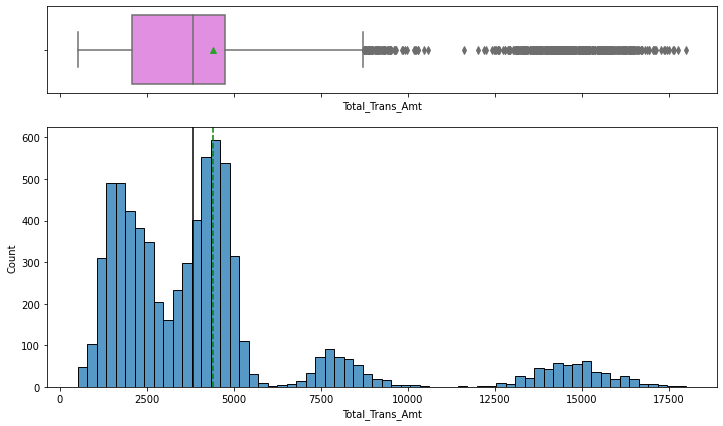

<IPython.core.display.Javascript object>

In [27]:
histogram_boxplot(df, 'Total_Trans_Amt')

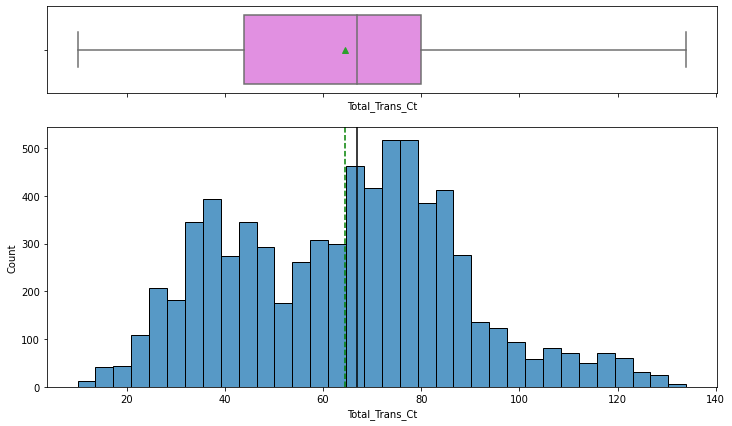

<IPython.core.display.Javascript object>

In [28]:
histogram_boxplot(df, 'Total_Trans_Ct')

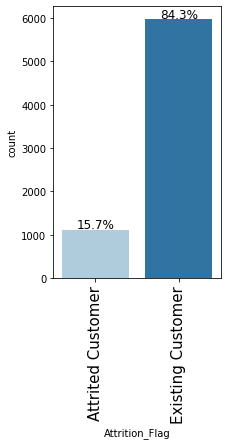

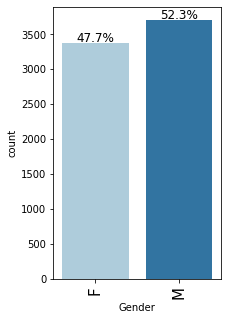

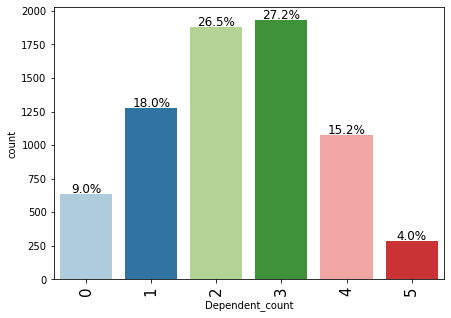

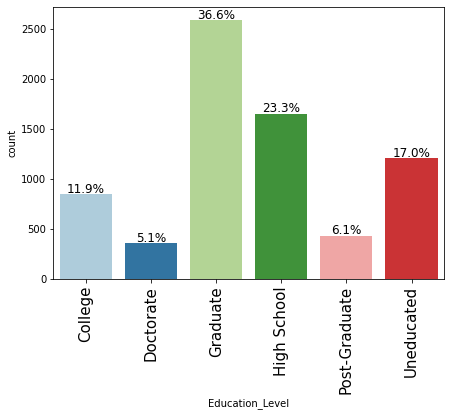

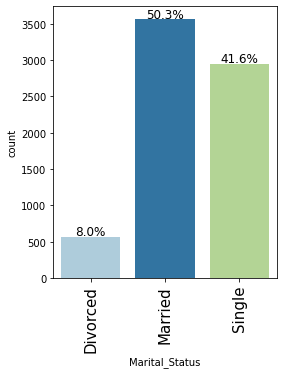

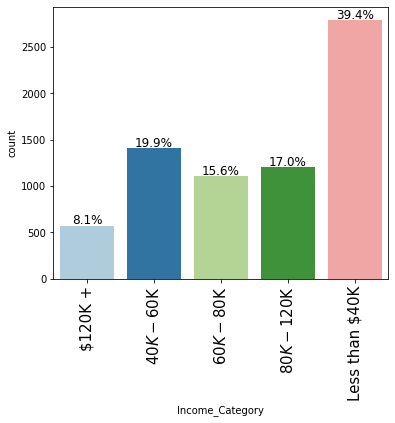

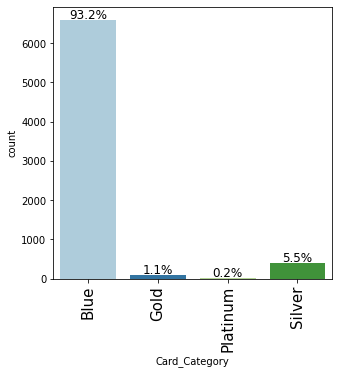

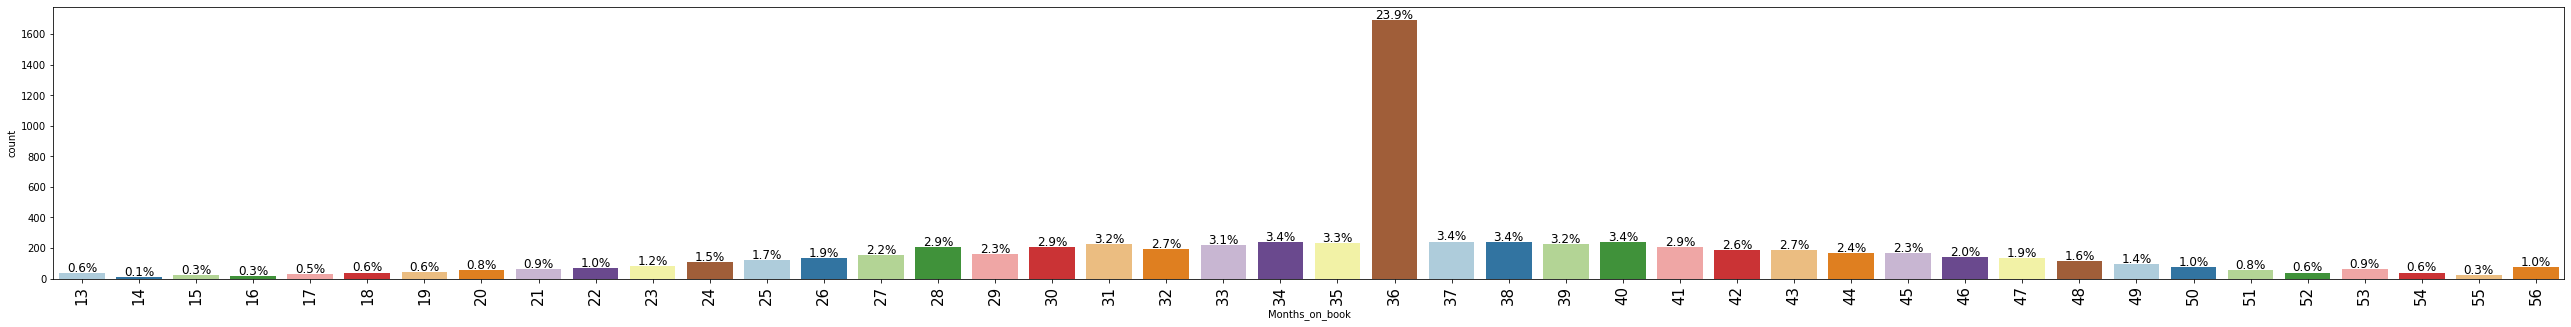

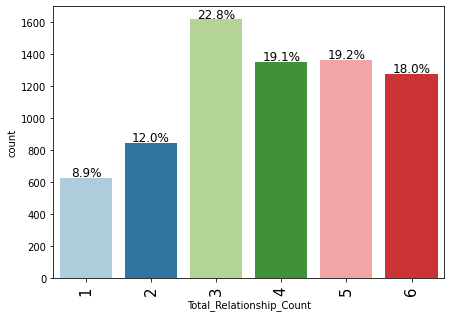

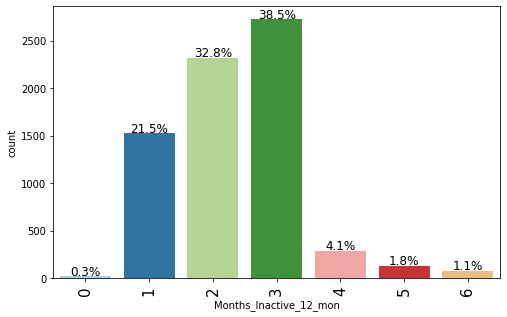

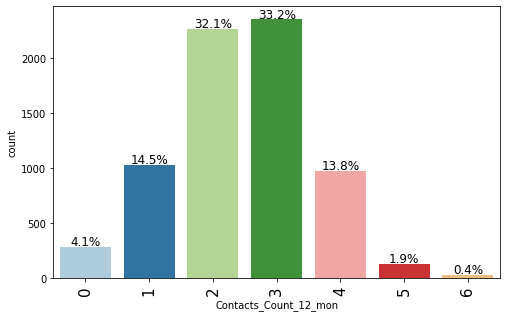

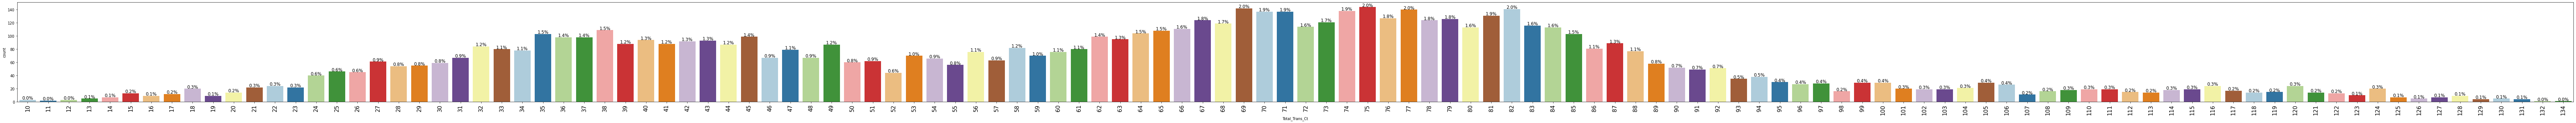

<IPython.core.display.Javascript object>

In [29]:
plots = df.copy()
plots.drop(columns=['Total_Revolving_Bal', 'Credit_Limit', 'Customer_Age', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Trans_Amt', 'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'], axis = 1, inplace=True)

for i in plots:
    labeled_barplot(plots, i, perc=True)

### Bivariate Analysis

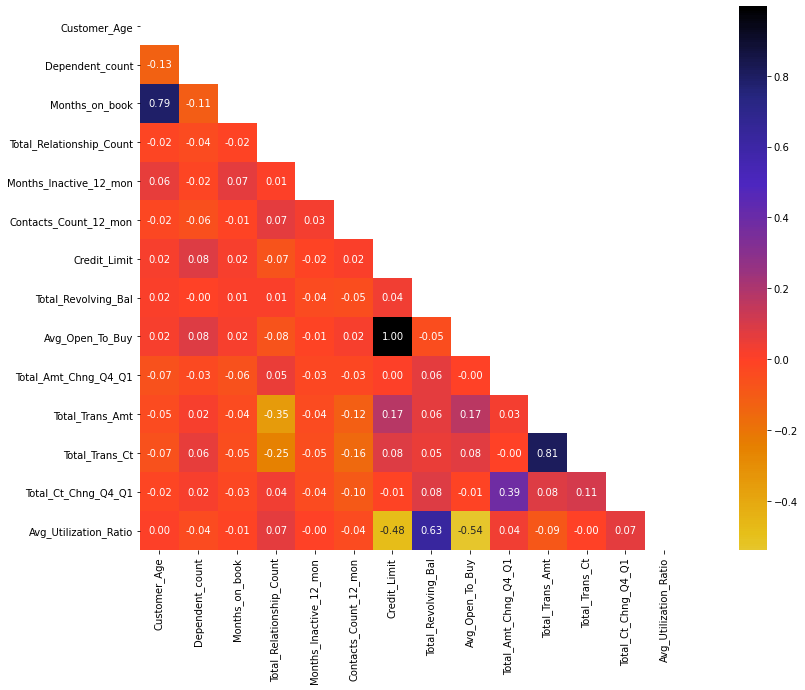

<IPython.core.display.Javascript object>

In [30]:
# Generating the lower half a heatmap only
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(20,10))
sns.heatmap(corr, mask=mask, center=0, annot=True, fmt='.2f', square=True, cmap='CMRmap_r')
plt.show()

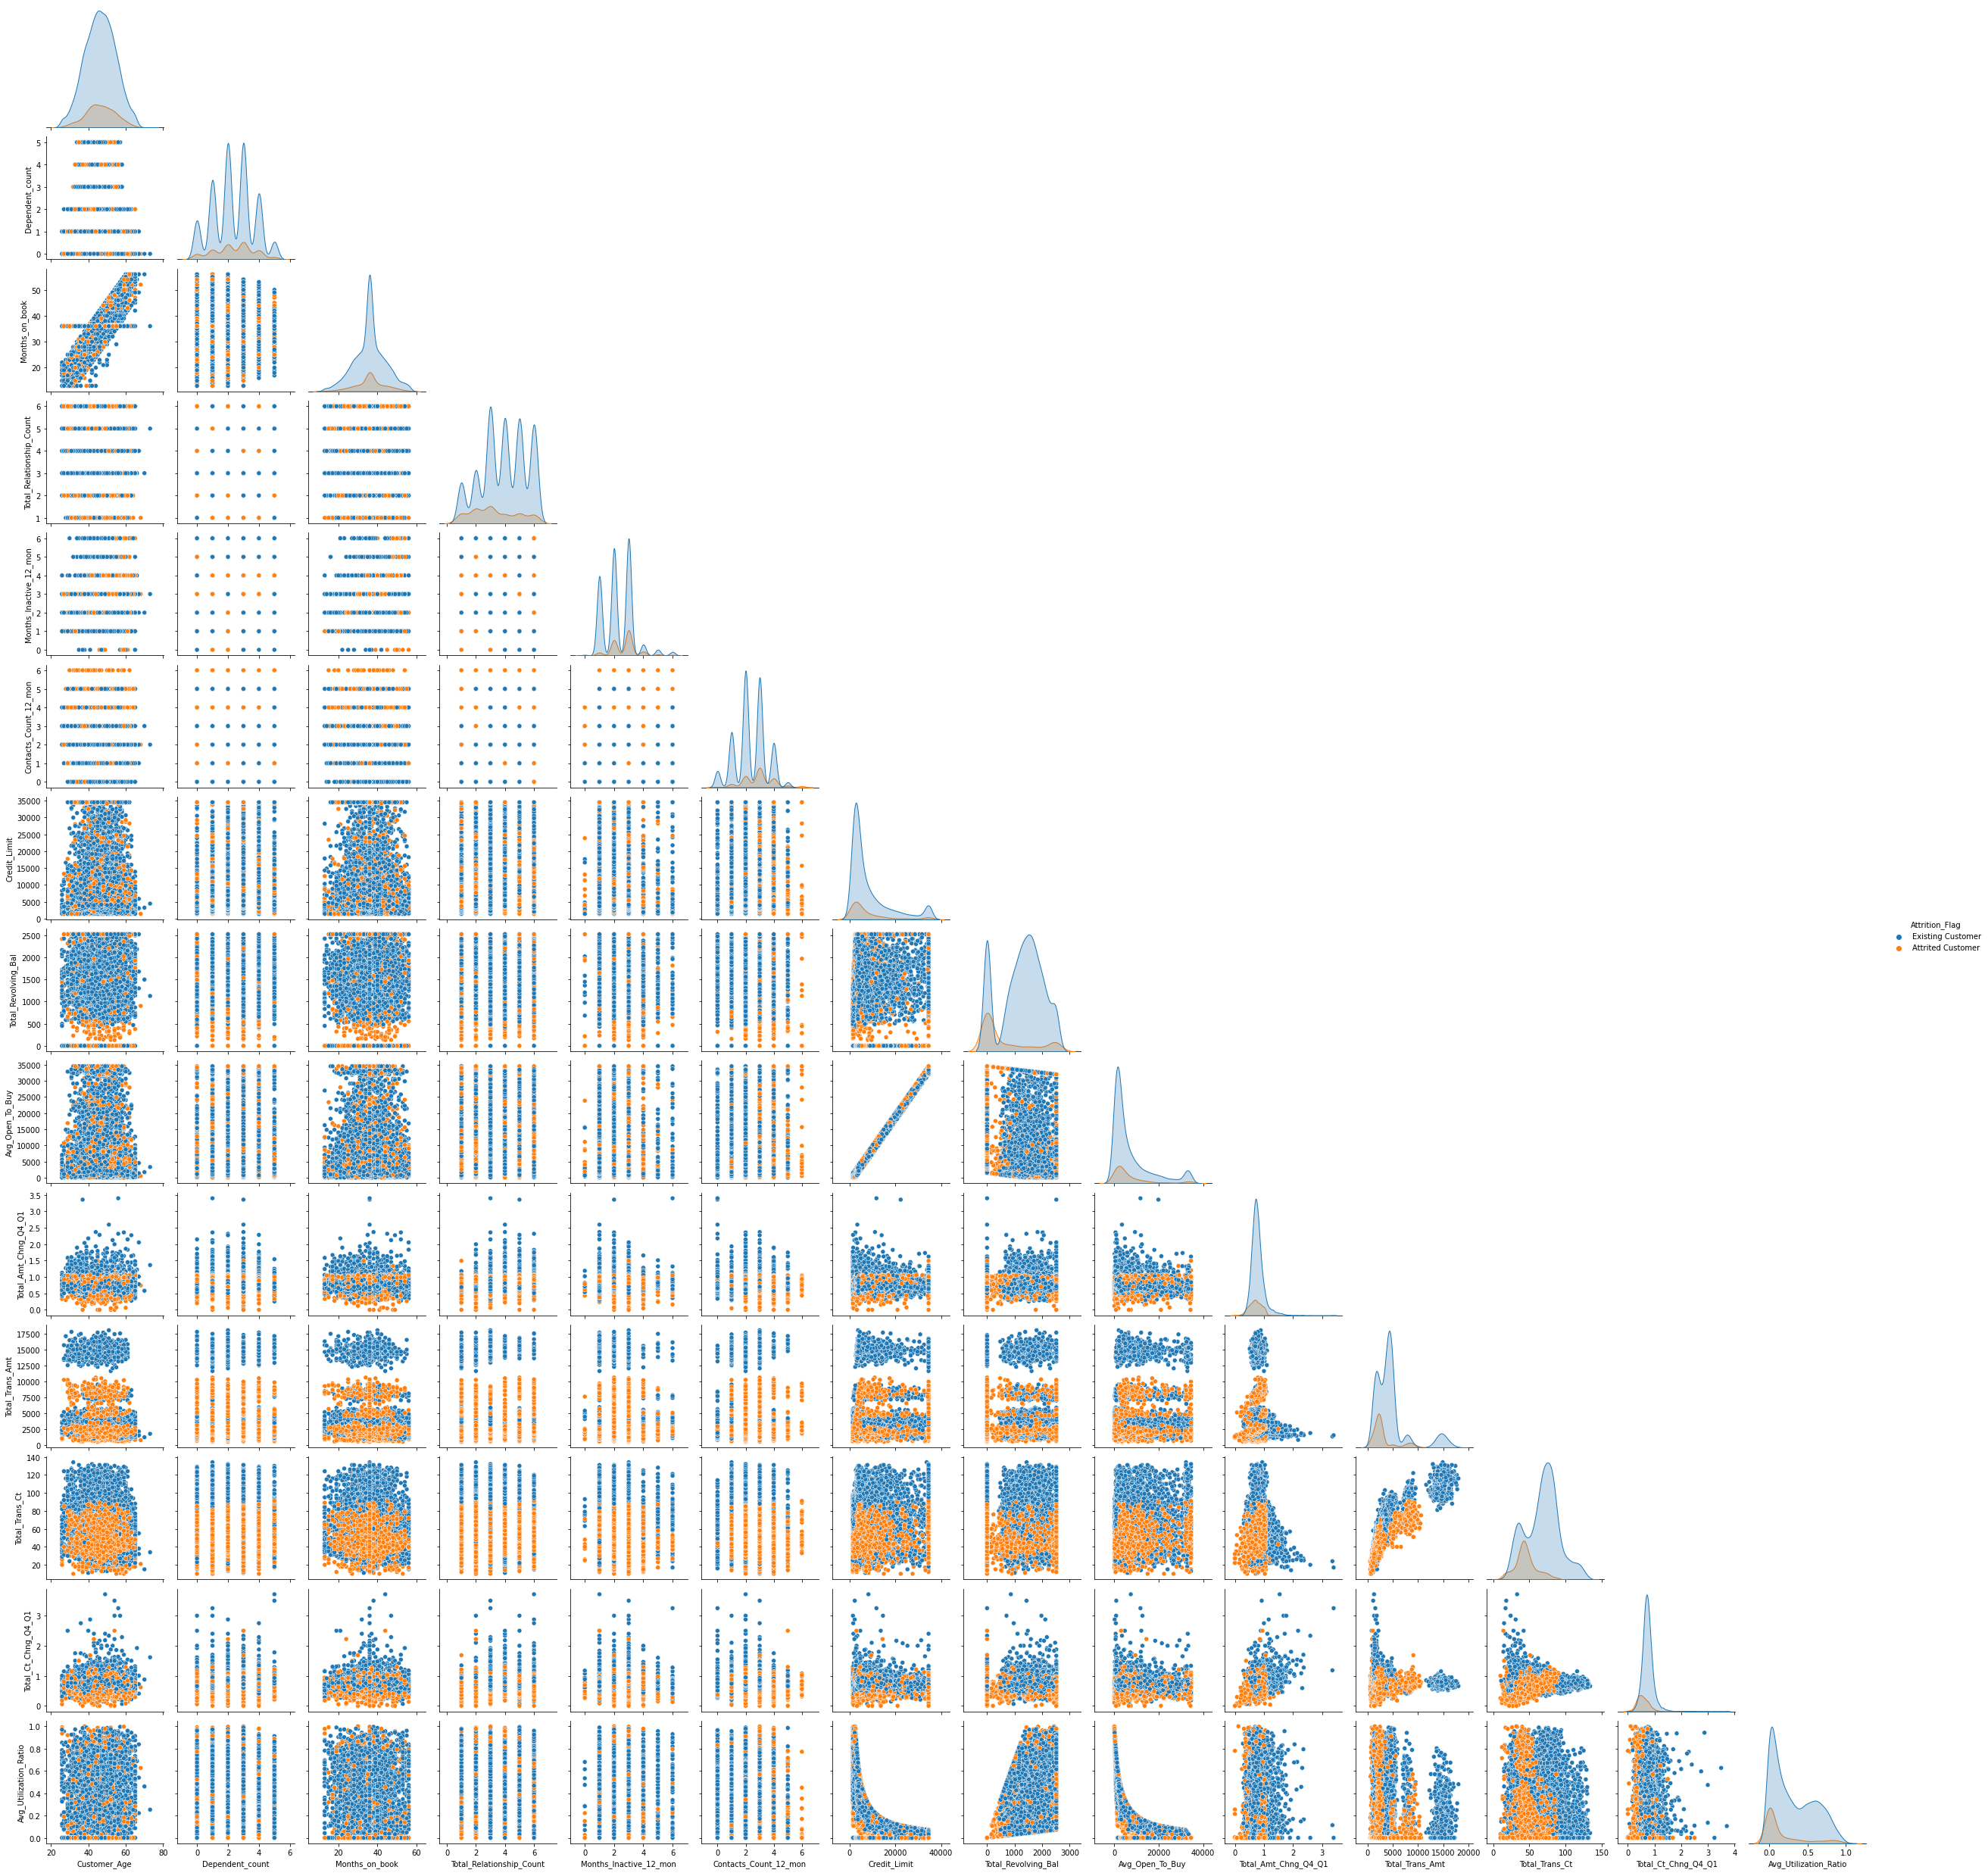

<IPython.core.display.Javascript object>

In [31]:
# Generating the lower half a heatmap only
sns.pairplot(df, corner=True, hue='Attrition_Flag')
plt.show()

Bar Charts for all features in relation to ProdTaken
Attrition_Flag     Attrited Customer  Existing Customer   All
Attrition_Flag                                               
Attrited Customer               1113                  0  1113
All                             1113               5968  7081
Existing Customer                  0               5968  5968
------------------------------------------------------------------------------------------------------------------------


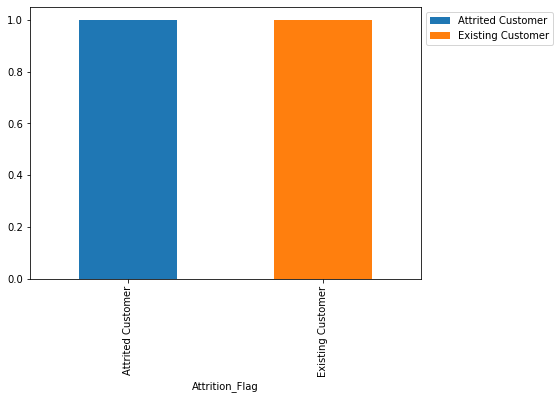

Attrition_Flag  Attrited Customer  Existing Customer   All
Gender                                                    
All                          1113               5968  7081
F                             576               2799  3375
M                             537               3169  3706
------------------------------------------------------------------------------------------------------------------------


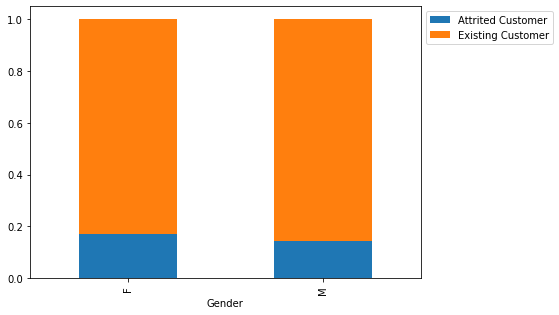

Attrition_Flag   Attrited Customer  Existing Customer   All
Dependent_count                                            
All                           1113               5968  7081
3                              329               1600  1929
2                              285               1595  1880
1                              184               1090  1274
4                              171                906  1077
0                              101                535   636
5                               43                242   285
------------------------------------------------------------------------------------------------------------------------


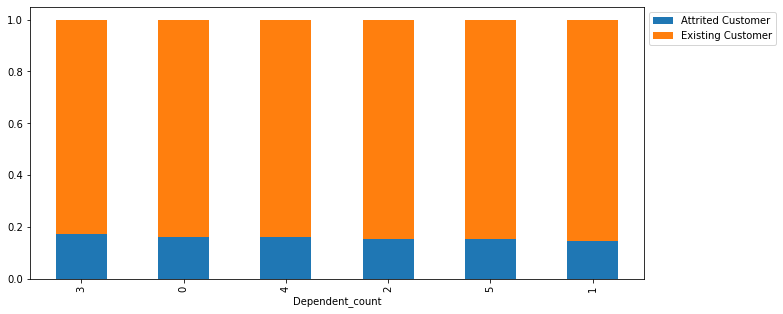

Attrition_Flag   Attrited Customer  Existing Customer   All
Education_Level                                            
All                           1113               5968  7081
Graduate                       406               2185  2591
High School                    237               1416  1653
Uneducated                     186               1018  1204
College                        132                712   844
Post-Graduate                   77                354   431
Doctorate                       75                283   358
------------------------------------------------------------------------------------------------------------------------


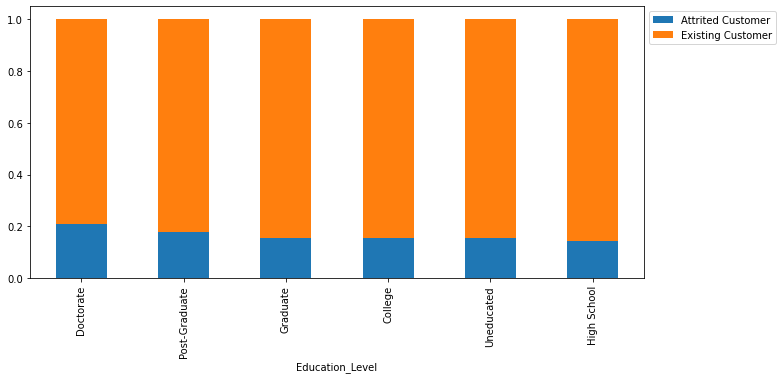

Attrition_Flag  Attrited Customer  Existing Customer   All
Marital_Status                                            
All                          1113               5968  7081
Married                       529               3035  3564
Single                        492               2456  2948
Divorced                       92                477   569
------------------------------------------------------------------------------------------------------------------------


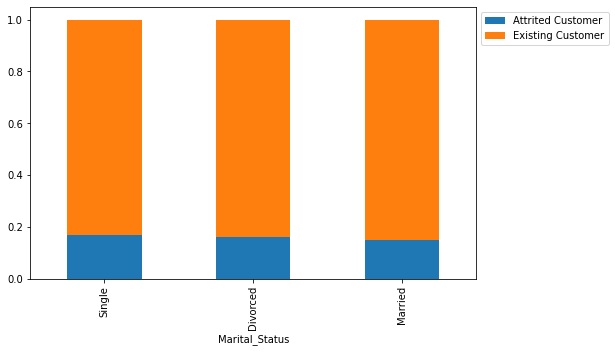

Attrition_Flag   Attrited Customer  Existing Customer   All
Income_Category                                            
All                           1113               5968  7081
Less than $40K                 473               2319  2792
$40K - $60K                    204               1208  1412
$80K - $120K                   189               1013  1202
$60K - $80K                    145                958  1103
$120K +                        102                470   572
------------------------------------------------------------------------------------------------------------------------


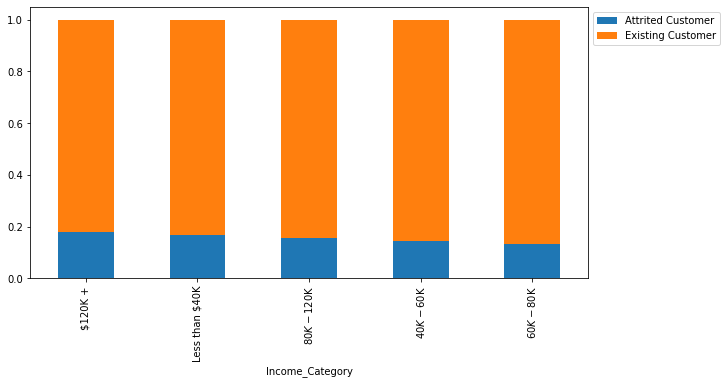

Attrition_Flag  Attrited Customer  Existing Customer   All
Card_Category                                             
All                          1113               5968  7081
Blue                         1034               5564  6598
Silver                         63                328   391
Gold                           13                 68    81
Platinum                        3                  8    11
------------------------------------------------------------------------------------------------------------------------


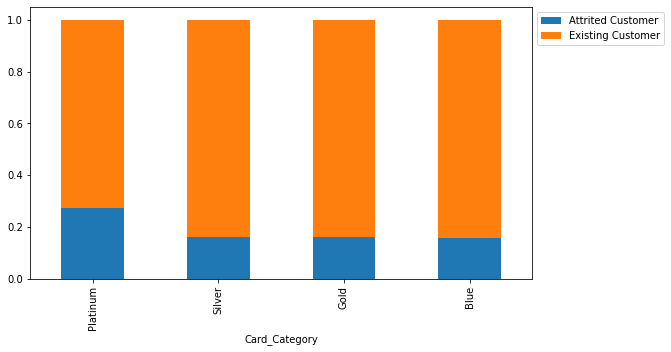

Attrition_Flag  Attrited Customer  Existing Customer   All
Months_on_book                                            
All                          1113               5968  7081
36                            293               1400  1693
37                             43                199   242
30                             43                165   208
39                             39                185   224
38                             38                200   238
34                             38                201   239
41                             34                172   206
40                             32                207   239
33                             31                190   221
28                             30                175   205
35                             30                203   233
46                             29                113   142
43                             29                160   189
44                             28                139   1

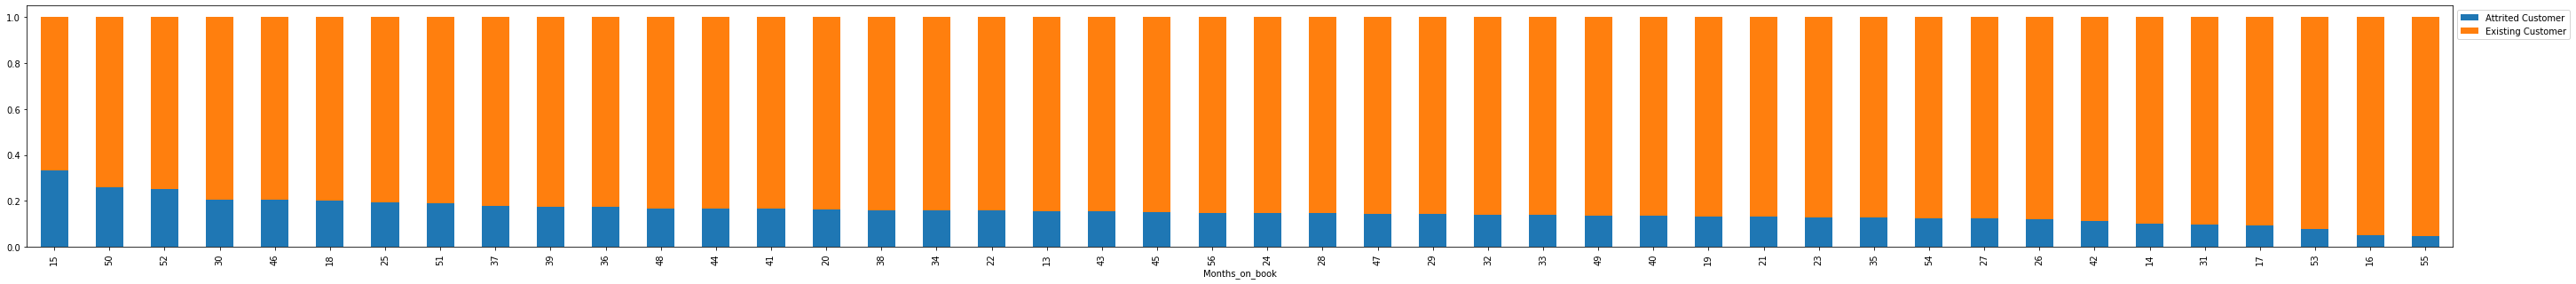

Attrition_Flag            Attrited Customer  Existing Customer   All
Total_Relationship_Count                                            
All                                    1113               5968  7081
3                                       277               1340  1617
2                                       236                612   848
5                                       160               1203  1363
1                                       158                469   627
4                                       141               1209  1350
6                                       141               1135  1276
------------------------------------------------------------------------------------------------------------------------


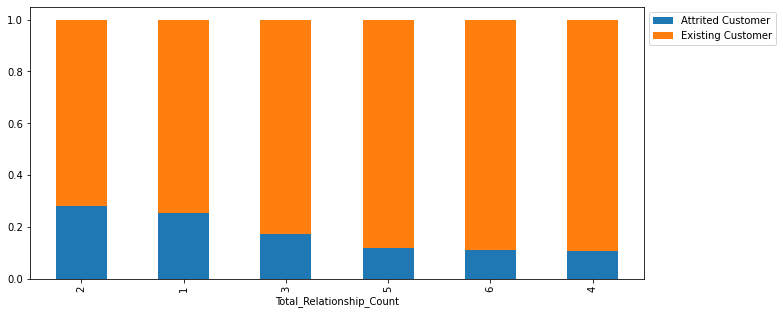

Attrition_Flag          Attrited Customer  Existing Customer   All
Months_Inactive_12_mon                                            
All                                  1113               5968  7081
3                                     570               2154  2724
2                                     348               1972  2320
4                                      88                201   289
1                                      65               1460  1525
5                                      22                107   129
6                                      11                 64    75
0                                       9                 10    19
------------------------------------------------------------------------------------------------------------------------


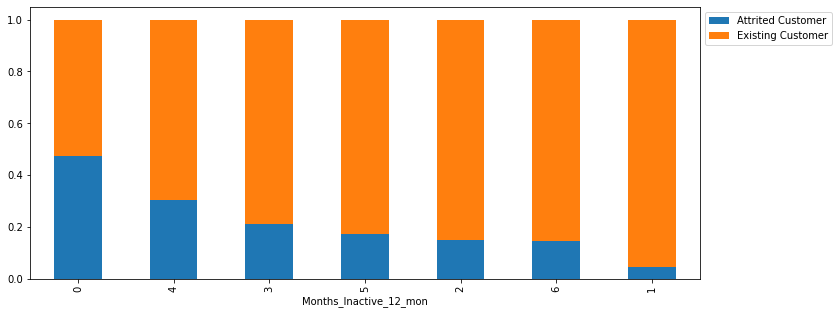

Attrition_Flag         Attrited Customer  Existing Customer   All
Contacts_Count_12_mon                                            
All                                 1113               5968  7081
3                                    469               1885  2354
2                                    271               2000  2271
4                                    215                763   978
1                                     80                949  1029
5                                     43                 88   131
6                                     30                  0    30
0                                      5                283   288
------------------------------------------------------------------------------------------------------------------------


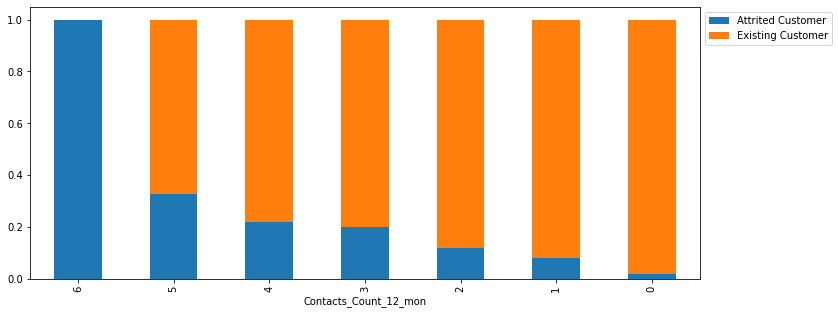

Attrition_Flag  Attrited Customer  Existing Customer   All
Total_Trans_Ct                                            
All                          1113               5968  7081
43                             53                 40    93
42                             52                 40    92
40                             47                 47    94
44                             46                 41    87
...                           ...                ...   ...
106                             0                 26    26
107                             0                 11    11
108                             0                 16    16
109                             0                 18    18
103                             0                 19    19

[125 rows x 3 columns]
------------------------------------------------------------------------------------------------------------------------


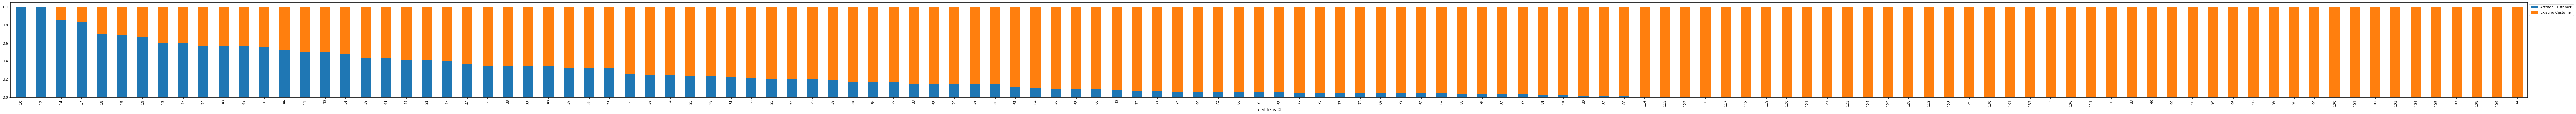

<IPython.core.display.Javascript object>

In [32]:
print('Bar Charts for all features in relation to ProdTaken')
for i in plots:
    stacked_barplot(plots, i, "Attrition_Flag" )

### Data Preperation for Modeling

In [33]:
# creating a new data frame, dropping the customer interaction data and generating dummies 
df1 = df.copy()
df1 = pd.get_dummies(df1, columns=one_hots, drop_first=True)
X = df1.drop(["Attrition_Flag_Existing Customer"], axis=1)
y = df1["Attrition_Flag_Existing Customer"]

<IPython.core.display.Javascript object>

In [34]:
# Splitting data into training, validation and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(4248, 29) (1416, 29) (1417, 29)


<IPython.core.display.Javascript object>

In [35]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Shape of the validation set: ", X_val.shape)
print("")
print("---------------------------------------")
print("")
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("")
print("---------------------------------------")
print("")
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (4248, 29)
Shape of test set :  (1417, 29)
Shape of the validation set:  (1416, 29)

---------------------------------------

Percentage of classes in training set:
1   0.843
0   0.157
Name: Attrition_Flag_Existing Customer, dtype: float64

---------------------------------------

Percentage of classes in test set:
1   0.843
0   0.157
Name: Attrition_Flag_Existing Customer, dtype: float64


<IPython.core.display.Javascript object>

### Evaluation Criteria: Accuracy / F1 Micro

We will be using accuracy as our core metric for this model. As the goal of this model is to evaluate who will leave their services. As the such it is more important to know we are identifing the right customers and it less important to optimize for recall or precision. 

### Reusable Functions

In [36]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [37]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

In [38]:
# Plotting boxplots for CV scores of all models defined above
def cv_score_boxplot(results, names):
    fig = plt.figure()

    fig.suptitle("Algorithm Comparison")
    ax = fig.add_subplot(111)

    plt.boxplot(results)
    ax.set_xticklabels(names)

    plt.xticks(rotation = 45)
    plt.show()

<IPython.core.display.Javascript object>

### Training the Models

In [39]:
models = [] # Empty list to store all the models

# Appending models into the list
models.append(('Logistic Regression', LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models
score = []

# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")
for name, model in models:
    scoring = "f1_micro"
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    cv_result = cross_val_score(estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold)
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Validation Performance:" "\n")

for name, model in models:
#    model.fit(X_train, y_train)
#    scores = accuracy_score(y_val, model.predict(X_val))
#    score.append(scores)
#    print("{}: {}".format(name, scores))
    
    if name == 'Random forest': # creating a variable to use for tuning
        rf = model.fit(X_train, y_train)
        scores = accuracy_score(y_val, model.predict(X_val))
        score.append(scores)
        print("{}: {}".format(name, scores))
    elif name == 'Bagging': # creating a variable to use for tuning
        bg = model.fit(X_train, y_train)
        scores = accuracy_score(y_val, model.predict(X_val))
        score.append(scores)
        print("{}: {}".format(name, scores))
    elif name == 'Adaboost': # creating a variable to use for tuning
        ab = model.fit(X_train, y_train)
        scores = accuracy_score(y_val, model.predict(X_val))
        score.append(scores)
        print("{}: {}".format(name, scores))
    else:
        model.fit(X_train, y_train)
        scores = accuracy_score(y_val, model.predict(X_val))
        score.append(scores)
        print("{}: {}".format(name, scores))


Cross-Validation Performance:

Logistic Regression: 88.25286496223931
Bagging: 94.72669576664588
Random forest: 94.72666805237996
GBM: 95.92711148063465
Adaboost: 95.31520820342271
Xgboost: 96.18643386683294
dtree: 92.32569805307283

Validation Performance:

Logistic Regression: 0.8870056497175142
Bagging: 0.9597457627118644
Random forest: 0.9569209039548022
GBM: 0.972457627118644
Adaboost: 0.9639830508474576
Xgboost: 0.9759887005649718
dtree: 0.9322033898305084


<IPython.core.display.Javascript object>

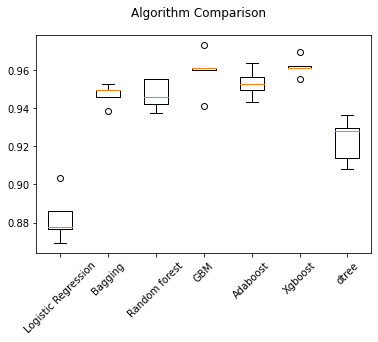

<IPython.core.display.Javascript object>

In [40]:
cv_score_boxplot(results, names)

### Over Sampling and Training the models

In [41]:
print("Train Before UpSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Train Before UpSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
print("Validation Before UpSampling, counts of label '1': {}".format(sum(y_val == 1)))
print("Validation Before UpSampling, counts of label '0': {} \n".format(sum(y_val == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)
X_val_over, y_val_over = sm.fit_resample(X_val, y_val)

print("Train After UpSampling, counts of label '1': {}".format(sum(y_train_over == 1)))
print("Train After UpSampling, counts of label '0': {} \n".format(sum(y_train_over == 0)))
print("Val After UpSampling, counts of label '1': {}".format(sum(y_val_over == 1)))
print("Val After UpSampling, counts of label '0': {} \n".format(sum(y_val_over == 0)))

print("Train After UpSampling, the shape of train_X: {}".format(X_train_over.shape))
print("Train After UpSampling, the shape of train_y: {} \n".format(y_train_over.shape))
print("Validation After UpSampling, the shape of val_X: {}".format(X_val_over.shape))
print("Validation After UpSampling, the shape of val_y: {} \n".format(y_val_over.shape))

Train Before UpSampling, counts of label '1': 3580
Train Before UpSampling, counts of label '0': 668 

Validation Before UpSampling, counts of label '1': 1194
Validation Before UpSampling, counts of label '0': 222 

Train After UpSampling, counts of label '1': 3580
Train After UpSampling, counts of label '0': 3580 

Val After UpSampling, counts of label '1': 1194
Val After UpSampling, counts of label '0': 1194 

Train After UpSampling, the shape of train_X: (7160, 29)
Train After UpSampling, the shape of train_y: (7160,) 

Validation After UpSampling, the shape of val_X: (2388, 29)
Validation After UpSampling, the shape of val_y: (2388,) 



<IPython.core.display.Javascript object>

In [42]:
models_over = [] # Empty list to store all the models

# Appending models into the list
models_over.append(('Logistic Regression Over', LogisticRegression(random_state=1)))
models_over.append(("Bagging Over", BaggingClassifier(random_state=1)))
models_over.append(("Random forest Over", RandomForestClassifier(random_state=1)))
models_over.append(("GBM Over", GradientBoostingClassifier(random_state=1)))
models_over.append(("Adaboost Over", AdaBoostClassifier(random_state=1)))
models_over.append(("Xgboost Over", XGBClassifier(random_state=1, eval_metric="logloss")))
models_over.append(("Dtree Over", DecisionTreeClassifier(random_state=1)))

results_over = []  # Empty list to store all model's CV scores
names_over = []  # Empty list to store name of the models
score_over = []

# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")
for name_over, model_over in models_over:
    cv_result_over = cross_val_score(estimator=model_over, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold)
    results_over.append(cv_result_over)
    names_over.append(name_over)
    print("{}: {}".format(name_over, cv_result_over.mean() * 100))

print("\n" "Validation Performance:" "\n")

for name_over, model_over in models_over:
    model_over.fit(X_train_over, y_train_over)
    scores_over = accuracy_score(y_val_over, model.predict(X_val_over))
    score.append(scores)
    print("{}: {}".format(name_over, scores_over))


Cross-Validation Performance:

Logistic Regression Over: 80.5586592178771
Bagging Over: 95.94972067039105
Random forest Over: 97.47206703910614
GBM Over: 96.96927374301676
Adaboost Over: 96.07541899441341
Xgboost Over: 98.01675977653632
Dtree Over: 94.80446927374302

Validation Performance:

Logistic Regression Over: 0.9007537688442211
Bagging Over: 0.9007537688442211
Random forest Over: 0.9007537688442211
GBM Over: 0.9007537688442211
Adaboost Over: 0.9007537688442211
Xgboost Over: 0.9007537688442211
Dtree Over: 0.9007537688442211


<IPython.core.display.Javascript object>

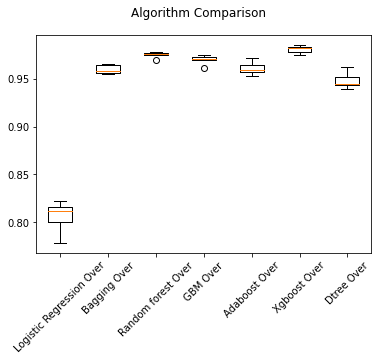

<IPython.core.display.Javascript object>

In [43]:
cv_score_boxplot(results_over, names_over)

### Under Sampling and Training the Models

In [44]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)
X_val_un, y_val_un = rus.fit_resample(X_val, y_val)

<IPython.core.display.Javascript object>

In [45]:
print("Training Before Under Sampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Training Before Under Sampling, counts of label '0': {} \n".format(sum(y_train == 0)))
print("Validation Before Under Sampling, counts of label '1': {}".format(sum(y_val == 1)))
print("Validation Before Under Sampling, counts of label '0': {} \n".format(sum(y_val == 0)))

print("Training After Under Sampling, counts of label '1': {}".format(sum(y_train_un == 1)))
print("Training After Under Sampling, counts of label '0': {} \n".format(sum(y_train_un == 0)))
print("Validation After Under Sampling, counts of label '1': {}".format(sum(y_val_un == 1)))
print("Validation After Under Sampling, counts of label '0': {} \n".format(sum(y_val_un == 0)))

print("Training After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("Training After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))
print("Validation After Under Sampling, the shape of val_X: {}".format(X_val_un.shape))
print("Validation After Under Sampling, the shape of val_y: {} \n".format(y_val_un.shape))

Training Before Under Sampling, counts of label '1': 3580
Training Before Under Sampling, counts of label '0': 668 

Validation Before Under Sampling, counts of label '1': 1194
Validation Before Under Sampling, counts of label '0': 222 

Training After Under Sampling, counts of label '1': 668
Training After Under Sampling, counts of label '0': 668 

Validation After Under Sampling, counts of label '1': 222
Validation After Under Sampling, counts of label '0': 222 

Training After Under Sampling, the shape of train_X: (1336, 29)
Training After Under Sampling, the shape of train_y: (1336,) 

Validation After Under Sampling, the shape of val_X: (444, 29)
Validation After Under Sampling, the shape of val_y: (444,) 



<IPython.core.display.Javascript object>

In [46]:
models_un = [] # Empty list to store all the models

# Appending models into the list
models_un.append(('Logistic Regression Under', LogisticRegression(random_state=1)))
models_un.append(("Bagging Under", BaggingClassifier(random_state=1)))
models_un.append(("Random forest Under", RandomForestClassifier(random_state=1)))
models_un.append(("GBM Under", GradientBoostingClassifier(random_state=1)))
models_un.append(("Adaboost Under", AdaBoostClassifier(random_state=1)))
models_un.append(("Xgboost Under", XGBClassifier(random_state=1, eval_metric="logloss")))
models_un.append(("Dtree Under", DecisionTreeClassifier(random_state=1)))

results_un = []  # Empty list to store all model's CV scores
names_un = []  # Empty list to store name of the models
scores_un = []

# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")
for name_un, model_un in models_un:
    cv_result_un = cross_val_score(estimator=model_un, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold)
    results_un.append(cv_result_un)
    names_un.append(name_un)
    print("{}: {}".format(name_un, cv_result_un.mean() * 100))

print("\n" "Validation Performance:" "\n")

for name_un, model_un in models_un:
    model_un.fit(X_train_un, y_train_un)
    scores_un = accuracy_score(y_val_un, model.predict(X_val_un))
    score.append(scores)
    print("{}: {}".format(name_un, scores_un))


Cross-Validation Performance:

Logistic Regression Under: 77.6943932025267
Bagging Under: 91.5425680585835
Random forest Under: 91.2423835876796
GBM Under: 93.33864385935492
Adaboost Under: 92.14070098943485
Xgboost Under: 93.63715132204149
Dtree Under: 87.7234613449606

Validation Performance:

Logistic Regression Under: 0.8806306306306306
Bagging Under: 0.8806306306306306
Random forest Under: 0.8806306306306306
GBM Under: 0.8806306306306306
Adaboost Under: 0.8806306306306306
Xgboost Under: 0.8806306306306306
Dtree Under: 0.8806306306306306


<IPython.core.display.Javascript object>

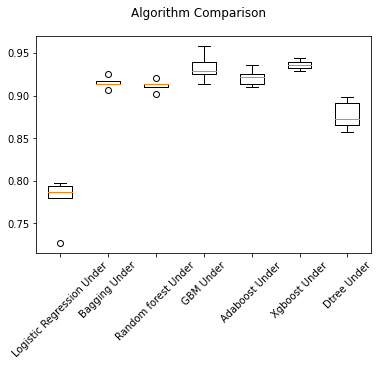

<IPython.core.display.Javascript object>

In [47]:
cv_score_boxplot(results_un, names_un)

### Hyper Parameter Tunning

Our orginial models that were not over or under sampled seem to be performing the best. Will focus on 3 of those for tuning 

,Accuracy,Recall,Precision,F1
RF Training,1.000,1.000,1.000,1.000
RF Test,0.946,0.985,0.952,0.968


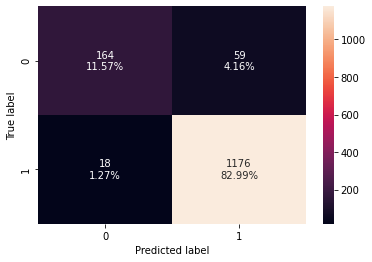

<IPython.core.display.Javascript object>

In [48]:
# Tuning Random Forest
rf_train_perf = model_performance_classification_sklearn(rf, X_train, y_train)
rf_test_perf = model_performance_classification_sklearn(rf, X_test, y_test)

confusion_matrix_sklearn(rf, X_test, y_test)

rf_compare = rf_train_perf.append(rf_test_perf, ignore_index=True)
rf_compare.index = ['RF Training','RF Test']

rf_compare.head()

In [49]:
#tuning the Random Forest Model
rf_tuned = RandomForestClassifier(class_weight={0:0.2,1:0.2}, random_state=1, oob_score=True, bootstrap=True)
rf_parameters = {'max_depth': list(np.arange(5,30,5)) + [None], 'max_features': ['sqrt', 'log2', None], 'min_samples_leaf': np.arange(1,15,5), 'min_samples_split': np.arange(2,20,5), 'n_estimators': np.arange(10,110,10)}

rf_grid_search = GridSearchCV(rf_tuned, rf_parameters, scoring='recall', cv=5, n_jobs=-1)
rf_grid_search = rf_grid_search.fit(X_train, y_train)

rf_tuned = rf_grid_search.best_estimator_
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.2}, max_depth=5,
                       max_features='log2', min_samples_split=17,
                       n_estimators=40, oob_score=True, random_state=1)

<IPython.core.display.Javascript object>

,Accuracy,Recall,Precision,F1
RF Training,1.000,1.000,1.000,1.000
RF Test,0.946,0.985,0.952,0.968
RF Tuned Training,0.916,0.994,0.914,0.952
RF Tuned Test,0.909,0.991,0.909,0.948


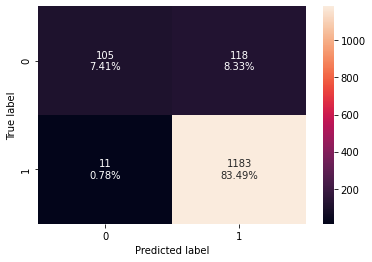

<IPython.core.display.Javascript object>

In [50]:
rf_train_perf_tuned = model_performance_classification_sklearn(rf_tuned, X_train, y_train)
rf_test_perf_tuned = model_performance_classification_sklearn(rf_tuned, X_test, y_test)

rf_compare = rf_compare.append(rf_train_perf_tuned, ignore_index=True)
rf_compare = rf_compare.append(rf_test_perf_tuned, ignore_index=True)
rf_compare.index = ['RF Training','RF Test','RF Tuned Training', 'RF Tuned Test']

confusion_matrix_sklearn(rf_tuned,X_test,y_test)

rf_compare.head()

,Accuracy,Recall,Precision,F1
AdaBoost Training,0.963,0.982,0.974,0.978
AdaBoost Test,0.945,0.968,0.967,0.967


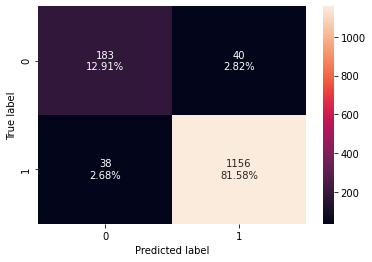

<IPython.core.display.Javascript object>

In [51]:
# Tuning AdaBoost
ab_train_pref = model_performance_classification_sklearn(ab, X_train, y_train)
ab_test_pref = model_performance_classification_sklearn(ab, X_test, y_test)

confusion_matrix_sklearn(ab, X_test, y_test)

ab_compare = ab_train_pref.append(ab_test_pref, ignore_index=True)
ab_compare.index = ['AdaBoost Training', 'AdaBoost Test']

ab_compare.head()

In [52]:
ab_tuned = AdaBoostClassifier(random_state=1)
ab_parameters = {'base_estimator':[DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=3)], 'n_estimators': np.arange(10,110,10), 'learning_rate':np.arange(0.1,2,0.1)}
ab_scorer = metrics.make_scorer(metrics.recall_score)

ab_grid_search = GridSearchCV(ab_tuned, ab_parameters, scoring=ab_scorer, cv=5)
ab_grid_search = ab_grid_search.fit(X_train, y_train)

ab_tuned = ab_grid_search.best_estimator_

ab_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.1, n_estimators=10, random_state=1)

<IPython.core.display.Javascript object>

,Accuracy,Recall,Precision,F1
Ada Boost Training,0.963,0.982,0.974,0.978
Ada Boost Test,0.945,0.968,0.967,0.967
Ada Boost Tunded Training,0.843,1.000,0.843,0.915
Ada Boost Tunded Test,0.843,1.000,0.843,0.915


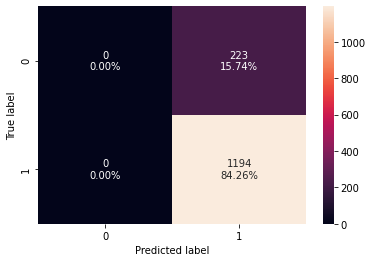

<IPython.core.display.Javascript object>

In [53]:
ab_train_perf_tuned = model_performance_classification_sklearn(ab_tuned, X_train, y_train)
ab_test_perf_tuned = model_performance_classification_sklearn(ab_tuned, X_test, y_test)

ab_compare = ab_compare.append(ab_train_perf_tuned, ignore_index=True)
ab_compare = ab_compare.append(ab_test_perf_tuned, ignore_index=True)
ab_compare.index = ['Ada Boost Training', 'Ada Boost Test', 'Ada Boost Tunded Training', 'Ada Boost Tunded Test']

confusion_matrix_sklearn(ab_tuned, X_test, y_test)

ab_compare.head()

,Accuracy,Recall,Precision,F1
Bagging Training,0.997,0.997,0.999,0.998
Bagging Test,0.942,0.961,0.970,0.966


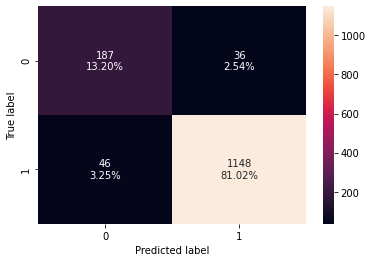

<IPython.core.display.Javascript object>

In [54]:
# Tuning Bagging
confusion_matrix_sklearn(bg, X_test, y_test)

bagging_train_perf = model_performance_classification_sklearn(bg, X_train, y_train)
bagging_test_perf = model_performance_classification_sklearn(bg, X_test, y_test)

bagging_compare = bagging_train_perf.append(bagging_test_perf, ignore_index=True)
bagging_compare.index = ['Bagging Training', 'Bagging Test']

bagging_compare.head()

In [55]:
# Tuning the Bagging Model

bagging_tuned = BaggingClassifier(random_state=1)

bagging_parameters = {'max_samples': [0.7,0.8,0.9,1], 'max_features': [0.7,0.8,0.9,1], 'n_estimators':[10,20,30,40,50]}

acc_scorer = metrics.make_scorer(metrics.recall_score)

bagging_grid_search = GridSearchCV(bagging_tuned, bagging_parameters, scoring=acc_scorer, cv=5)
bagging_grid_search = bagging_grid_search.fit(X_train, y_train)

bagging_tuned = bagging_grid_search.best_estimator_

bagging_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=1, n_estimators=20,
                  random_state=1)

<IPython.core.display.Javascript object>

,Accuracy,Recall,Precision,F1
Bagging Training,0.997,0.997,0.999,0.998
Bagging Test,0.942,0.961,0.970,0.966
Bagging Tunded Training,0.843,1.000,0.843,0.915
Bagging Tunded Test,0.843,1.000,0.843,0.915


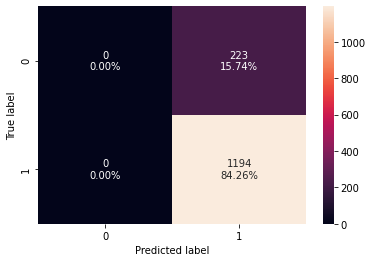

<IPython.core.display.Javascript object>

In [56]:
bagging_train_perf_tuned = model_performance_classification_sklearn(bagging_tuned, X_train, y_train)
bagging_test_perf_tuned = model_performance_classification_sklearn(bagging_tuned, X_test, y_test)

bagging_compare = bagging_compare.append(bagging_train_perf_tuned, ignore_index=True)
bagging_compare = bagging_compare.append(bagging_test_perf_tuned, ignore_index=True)
bagging_compare.index = ['Bagging Training', 'Bagging Test', 'Bagging Tunded Training', 'Bagging Tunded Test']

confusion_matrix_sklearn(bagging_tuned, X_test, y_test)

bagging_compare.head()

In [69]:
model_compare = rf_compare.copy()
model_compare = model_compare.append(bagging_compare)
model_compare = model_compare.append(ab_compare)
model_compare.head(12).T

,RF Training,RF Test,RF Tuned Training,RF Tuned Test,Bagging Training,Bagging Test,Bagging Tunded Training,Bagging Tunded Test,Ada Boost Training,Ada Boost Test,Ada Boost Tunded Training,Ada Boost Tunded Test
Accuracy,1.000,0.946,0.916,0.909,0.997,0.942,0.843,0.843,0.963,0.945,0.843,0.843
Recall,1.000,0.985,0.994,0.991,0.997,0.961,1.000,1.000,0.982,0.968,1.000,1.000
Precision,1.000,0.952,0.914,0.909,0.999,0.970,0.843,0.843,0.974,0.967,0.843,0.843
F1,1.000,0.968,0.952,0.948,0.998,0.966,0.915,0.915,0.978,0.967,0.915,0.915


<IPython.core.display.Javascript object>

### Building the Pipeline

In [58]:
# Transformers

megatron = Pipeline(
    steps=[
        ("onehot", OneHotEncoder(handle_unknown="ignore"))
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
       ("cat", megatron, one_hots),
    ]
)

<IPython.core.display.Javascript object>

In [59]:
# Separating target variable and other variables
X = df.drop("Attrition_Flag", axis=1)
Y = df["Attrition_Flag"]

<IPython.core.display.Javascript object>

In [60]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)
print(X_train.shape, X_test.shape)

(4956, 19) (2125, 19)


<IPython.core.display.Javascript object>

In [70]:
# Creating new pipeline with best parameters

# I have an error in my tranformers im not able to figure out. Leaving the rest of the code. 
model = Pipeline(
    steps=[
        ('pre', preprocessor)
        (
            "Bagging",
            BaggingClassifier(
                random_state=1,
            #    'max_samples': [0.7,0.8,0.9,1],
            #    'max_features': [0.7,0.8,0.9,1],
            #    'n_estimators':[10,20,30,40,50],
            ),
        ),
    ]
)


# Fit the model on training data
model.fit(X_train, y_train)

ValueError: could not convert string to float: 'M'

<IPython.core.display.Javascript object>